   GRE  TOEFL      CGPA  Research  AdmissionChance
0  290    110  9.417736         1              1.0
1  333    114  8.731446         1              1.0
2  292    117  8.301668         0              1.0
3  268    113  9.827699         1              1.0
4  335    114  8.249586         0              1.0
--Model Coefficients--
GRE:0.0000
Intercept:1.0000
TOEFL:0.0000
Intercept:1.0000
CGPA:0.0000
Intercept:1.0000
Research:0.0000
Intercept:1.0000
Metrics:
Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R2_Score: 1.0
Root Mean Squared Error: 0.0


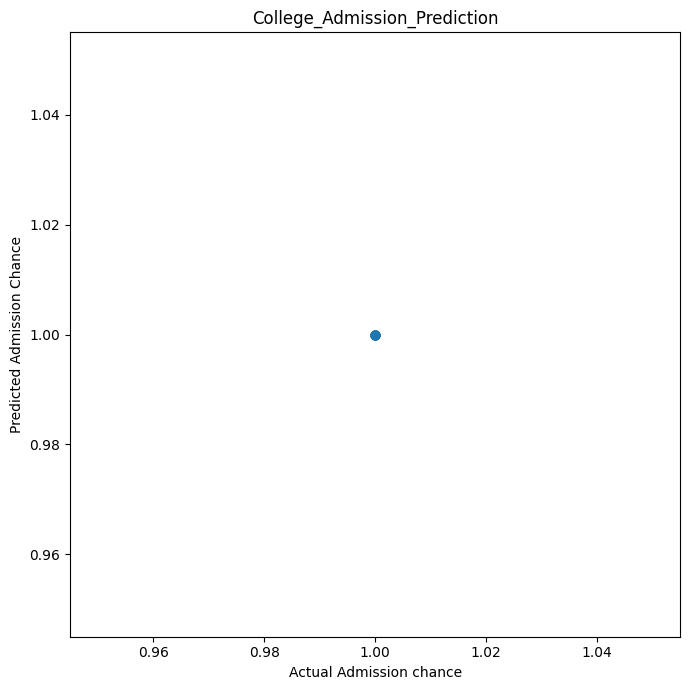

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df=pd.read_csv("college_admission.csv")
print(df.head())

feature_cols=["GRE","TOEFL","CGPA","Research"]
x=df[feature_cols]
df["AdmissionChance"] = (
    0.4 * df["CGPA"] / 10 +
    0.3 * df["GRE"] / 340 +
    0.2 * df["TOEFL"] / 120 +
    0.1 * df["Research"]
).clip(0, 1)
y=df["AdmissionChance"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

model=LinearRegression()
model.fit(x_train,y_train)
print("--Model Coefficients--")
for name, coef in zip(feature_cols,model.coef_):
    print(f"{name}:{coef:.4f}")
    print(f"Intercept:{model.intercept_:.4f}")

y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=mse**0.5

print("Metrics:")
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("R2_Score:",r2)
print("Root Mean Squared Error:",rmse)

plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("Actual Admission chance")
plt.ylabel("Predicted Admission Chance")
plt.title("College_Admission_Prediction")


max_value=max(y_test.max(),y_pred.max())
min_value=min(y_test.min(),y_pred.min())
plt.plot([min_value,max_value],[min_value,max_value])

plt.tight_layout()
plt.show()